# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy.builtins import *
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# READ DATA
gdp_le = pd.read_csv("../data/gdp_le.csv")

# DISPLAY TOP 2 ROWS
gdp_le.sort_values("Year").head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
5342,Uruguay,1990,11112.736405,South America,73.162000
4329,Seychelles,1990,15538.802834,Africa,68.107317


## 1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.

In [3]:
# FIT AN ORDINARY LEASE SQUARES (OLS) MODEL
lr_life_expectancy = smf.ols(formula="Life_Expectancy ~ Year", data=gdp_le).fit()

### a. What coefficients do you get? Interpret the meaning of these coefficents.

In [4]:
# DISPLAY THE PARAMS ATTRIBUTE
lr_life_expectancy.params

Intercept   -468.138140
Year           0.267722
dtype: float64

#### ANSWER: The intercept is predicting year 0 life expectancy -468 based on the data. The slope is 0.268 years.

b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [5]:
# REFIT THE DATA SO THAT THE MODEL STARTS AT 1990
lr_life_expectancy = smf.ols(formula="Life_Expectancy ~ I(Year-1990)", data=gdp_le).fit()
lr_life_expectancy.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

#### ANSWER: The intercept is predicting year 1990 life expectancy 64 now. The slope is still 0.268 years. Now they are significant and make sense.

### c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?

In [6]:
# COPY YEAR AND LIFE_EXPECTANCY TO NEW DATAFRAME
le_yr_df = gdp_le[["Year", "Life_Expectancy"]].copy()

# ADD COLUMN OF FITTED VALUES
le_yr_df['lr_fitted'] = lr_life_expectancy.fittedvalues

# CALCULATE MEANS BY YEAR TO NEW DATAFRAME
le_yr_mean_df = le_yr_df.groupby("Year")[['Life_Expectancy', 'lr_fitted']].mean()

# CALCULATE DIFFERENCE BETWEEN DATA AND FITTED VALUES
le_yr_mean_df['diff'] = le_yr_mean_df['Life_Expectancy'] - le_yr_mean_df['lr_fitted']
le_yr_mean_df

,Life_Expectancy,lr_fitted,diff
Year,,,
1990,64.745253,64.628889,0.116363
1991,65.021276,64.896612,0.124665
1992,65.217845,65.164334,0.053512
1993,65.218031,65.432056,-0.214025
1994,65.339539,65.699778,-0.360239
1995,65.956224,65.967500,-0.011276
1996,66.200189,66.235222,-0.035033
1997,66.437280,66.502944,-0.065664
1998,66.556082,66.770666,-0.214584


In [7]:
print(f"ANSWER: The model is only off by {abs(le_yr_mean_df['diff'].mean())} on average")

ANSWER: The model is only off by 0.00264707759699065 on average


### d. Plot the actual values against your model's estimates for the mean life expectancy.

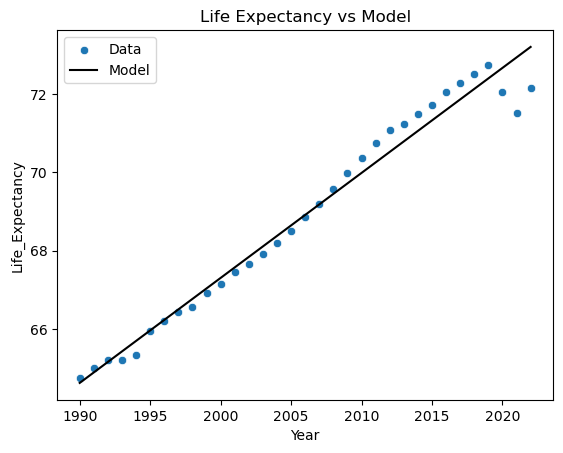

In [8]:
# CREATE LINE PLOT FOR DATA
ax = sns.scatterplot(data=le_yr_mean_df, x="Year", y="Life_Expectancy", label="Data")

# CREATE LINE PLOT FOR MODEL WITH PRIOR PLOT
sns.lineplot(data=le_yr_mean_df, x="Year", y="lr_fitted", ax=ax, label="Model", color="black")

# SET TITLE AND LEGEND
plt.title("Life Expectancy vs Model")
plt.legend();

e. Inspect the R-squared value for the model. does it make sense, given the plot?

In [9]:
print(f"ANSWER: Even though the plot shows that the model means have little variance from the actual data, the R-squared value {round(number=lr_life_expectancy.rsquared, ndigits=5)} means that the year is only {round(number=lr_life_expectancy.rsquared, ndigits=5) * 100}% of the determining factor in life expectancy.")

ANSWER: Even though the plot shows that the model means have little variance from the actual data, the R-squared value 0.07155 means that the year is only 7.155% of the determining factor in life expectancy.


## 2. Filter the full dataset down to just the year 2021.
Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.

In [10]:
# CREATE NEW DATASET
gdp_le_2021_df = gdp_le[gdp_le['Year'] == 2021].copy()

# FIT LINEAR REGRESSION MODEL
gdp_le_2021_lm = smf.ols(formula="Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021_df).fit()

### a. What coefficients do you get?
Interpret the meaning of those coefficients.

In [11]:
# DISPLAY PARAMS
gdp_le_2021_lm.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

In [12]:
print(f"ANSWER: Starting at {round(number=gdp_le_2021_lm.params.Intercept, ndigits=3)} years, the life expectancy will increase by {round(number=gdp_le_2021_lm.params.GDP_Per_Capita, ndigits=5)} for every GDP Per Capita unit increase.")

ANSWER: Starting at 65.95 years, the life expectancy will increase by 0.00026 for every GDP Per Capita unit increase.


### b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor.
How does this change your coefficients?

In [13]:
# REFIT THE MODEL USING PATSY
gdp_le_2021_lm = smf.ols(formula="Life_Expectancy ~ I(GDP_Per_Capita / 1000)", data=gdp_le_2021_df).fit()

# DISPLAY MODEL PARAMS
gdp_le_2021_lm.params

Intercept                   65.949870
I(GDP_Per_Capita / 1000)     0.256892
dtype: float64

In [14]:
print(f"The GDP_Per_Capita coefficient just increased by 1000: {gdp_le_2021_lm.params.iloc[1]}.")

The GDP_Per_Capita coefficient just increased by 1000: 0.2568917481806985.


### c. Are the coefficients statistically significant?

In [15]:
print(f"The coefficients are statistically significant based on the low p-value: {gdp_le_2021_lm.pvalues.iloc[1]}.")

The coefficients are statistically significant based on the low p-value: 6.810923113128574e-32.


### d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000?

What about one whose gdp per capita is $100,000?

In [16]:
print(f"ANSWER: $50k = {round(number=gdp_le_2021_lm.predict({"GDP_Per_Capita": 50000}).iloc[0], ndigits=3)} years.")

ANSWER: $50k = 78.794 years.


In [17]:
print(f"ANSWER: $100k = {round(number=gdp_le_2021_lm.predict({"GDP_Per_Capita": 100000}).iloc[0], ndigits=3)} years.")

ANSWER: $100k = 91.639 years.


### e. Plot the actual values compared to your model's estimates for mean life expectancy.
How would you assess the model's fit?

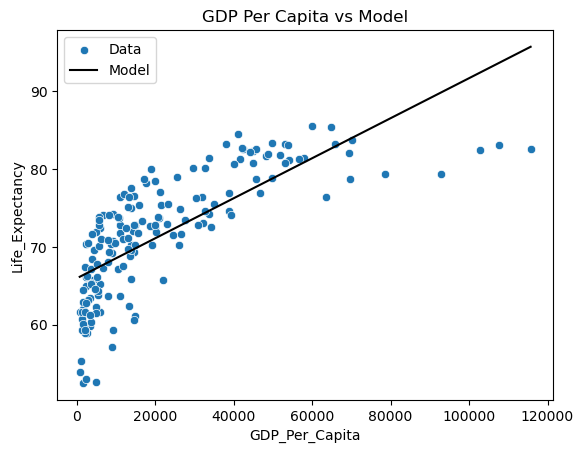

In [21]:
# CREATE NEW DATAFRAME
gdp_le_2021_fit_df = gdp_le_2021_df[['Life_Expectancy', 'GDP_Per_Capita']].copy()

# ADD FITTED VALUES
gdp_le_2021_fit_df['lr_fitted'] = gdp_le_2021_lm.fittedvalues

# CREATE PLOTS
ax = sns.scatterplot(data=gdp_le_2021_fit_df, x="GDP_Per_Capita", y="Life_Expectancy", label="Data")
sns.lineplot(data=gdp_le_2021_fit_df, x="GDP_Per_Capita", y="lr_fitted", ax=ax, color="black", label="Model")
plt.title(label="GDP Per Capita vs Model")
plt.legend();

#### ANSWER: Not a great fit.